# Import Data

In [741]:
import pandas as pd

# Read CSV

In [742]:
df = pd.read_csv("titanic_dataset/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Statistik deskriptif dari data

In [743]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Data Preprocessing

## Check value yang kosong

In [744]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Isi data kosong pada Kolom Age dengan Median

In [745]:
df['Age'] = df['Age'].fillna(df['Age'].median())

## Isi data kosong pada Kolom Embarked dengan Modus

In [746]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

## Drop kolom Cabin karena banyak yang kosong dan PassengerId Karena Tidak Diperlukan

In [747]:
df = df.drop('Cabin', axis=1)

In [748]:
df = df.drop('PassengerId', axis=1)

## Check hasil setelah di preprocess

In [749]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# EDA (Exploratory Data Analysis)

## Import Data

In [750]:
import matplotlib.pyplot as plt
import seaborn as sns

## Persentase Male dan Female

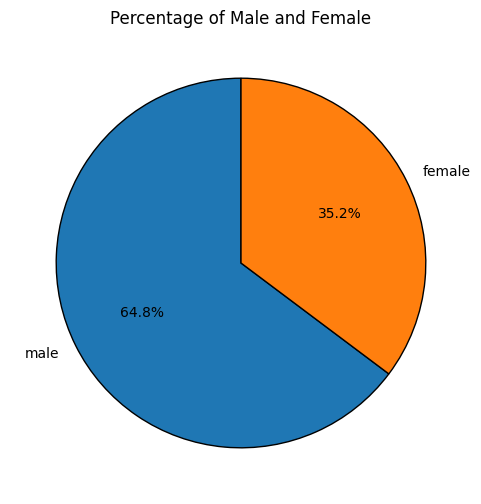

In [751]:
# Menghitung jumlah kategori
gender_counts = df['Sex'].value_counts()

# Membuat pie chart menggunakan Matplotlib tanpa menentukan warna
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Male and Female')
plt.show()

## Persentase Survived

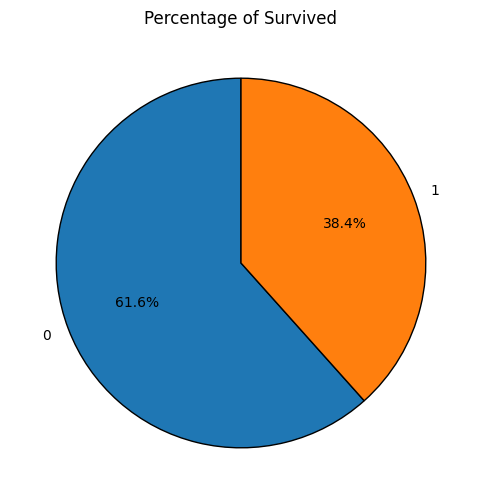

In [752]:
# Menghitung jumlah kategori
gender_counts = df['Survived'].value_counts()

# Membuat pie chart menggunakan Matplotlib tanpa menentukan warna
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Survived')
plt.show()

## Analisis Kolom Age

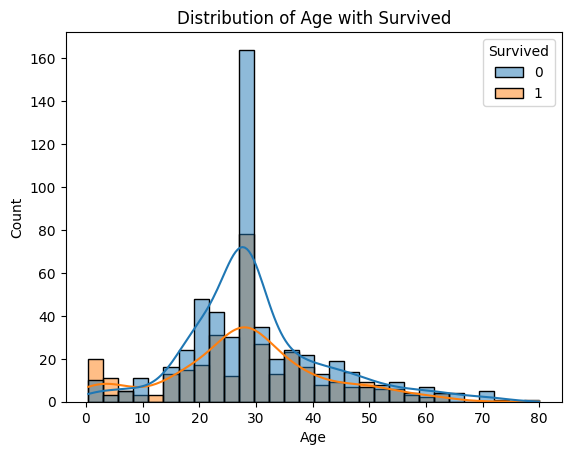

In [753]:
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Distribution of Age with Survived')
plt.show()

Anak-anak di bawah 10 tahun lebih berpeluang selamat, bisa jadi karena diprioritaskan untuk diselamatkan menggunakan sekoci

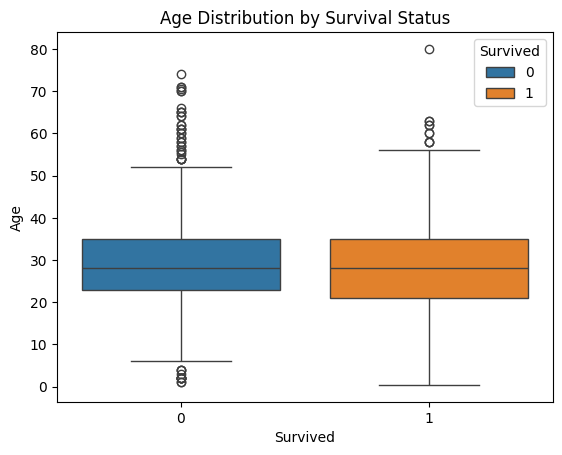

In [754]:
sns.boxplot(data=df, x='Survived', y='Age', hue='Survived')
plt.title('Age Distribution by Survival Status')
plt.show()

Area box Survived = 1 (Selamat) lebih rendah dibandingkan yang tidak selamat

### Analisis Kolom Fare

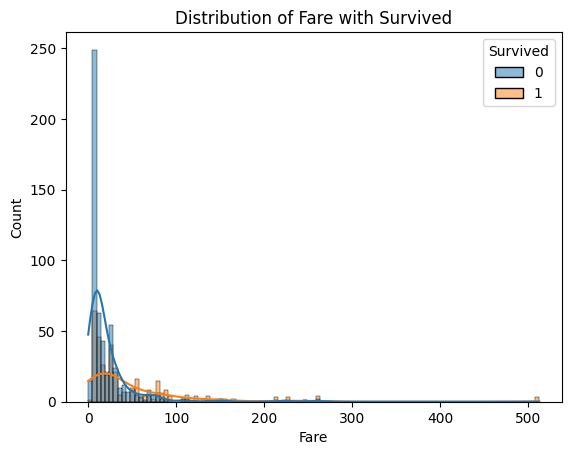

In [755]:
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Distribution of Fare with Survived')
plt.show()

Penumpang dengan biaya yang tinggi lebih berpeluang selamat dibanding yang memiliki biaya rendah

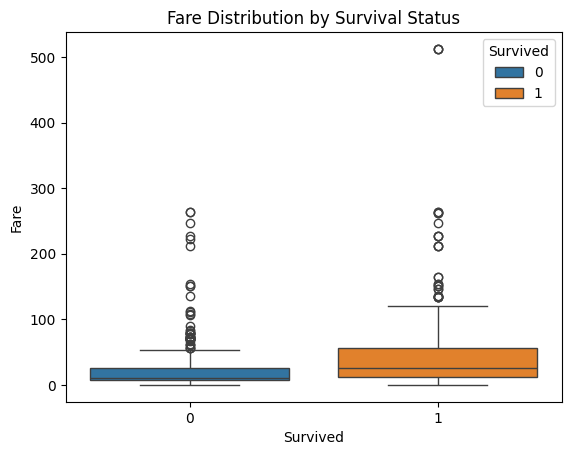

In [756]:
sns.boxplot(data=df, x='Survived', y='Fare', hue='Survived')
plt.title('Fare Distribution by Survival Status')
plt.show()

Area Boxplot yang selamat pada kolom Fare lebih tinggi dibandingkan yang tidak selamat

## Analisis Kolom Pclass

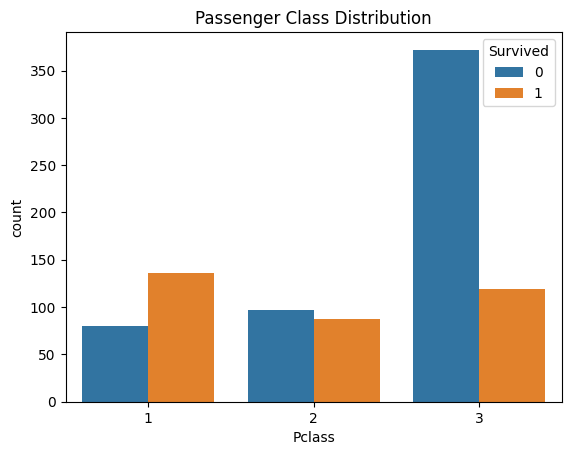

In [757]:
# Count plot for categorical features
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Passenger Class Distribution')
plt.show()

C:\Users\Imam Bari Setiawan\AppData\Local\Temp\ipykernel_6696\3845838660.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', palette='Set1')


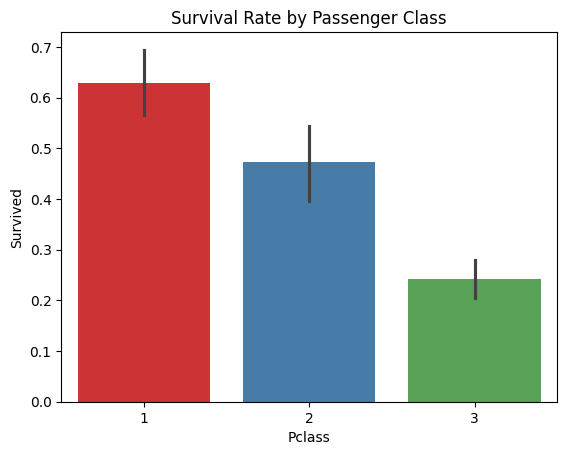

In [758]:
sns.barplot(data=df, x='Pclass', y='Survived', palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.show()

Persentase orang yang selamat pada Pclass = 1 lebih besar dibandingkan Pclass 2 dan 3

## Analisis Kolom Sex

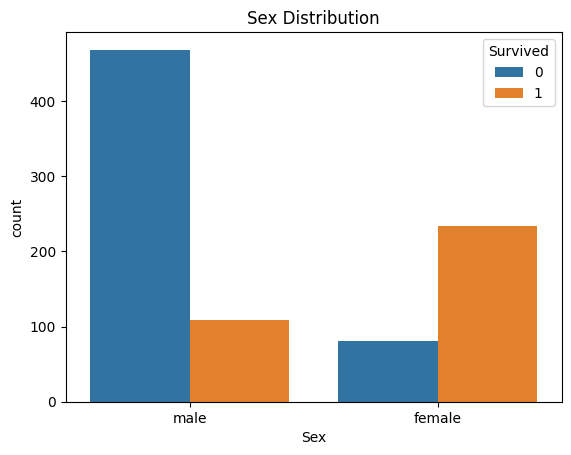

In [759]:
# Count plot for categorical features
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Sex Distribution')
plt.show()

C:\Users\Imam Bari Setiawan\AppData\Local\Temp\ipykernel_6696\2692277652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sex', y='Survived', palette='Set1')


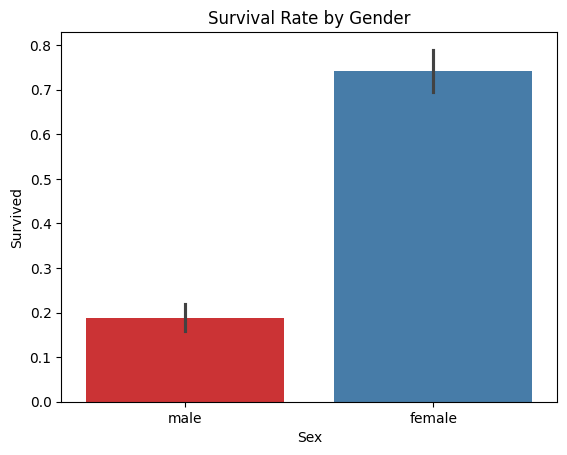

In [760]:
sns.barplot(data=df, x='Sex', y='Survived', palette='Set1')
plt.title('Survival Rate by Gender')
plt.show()

Persentase orang yang selamat pada Sex = female lebih tinggi dibandingkan male

## Correlation Matrix

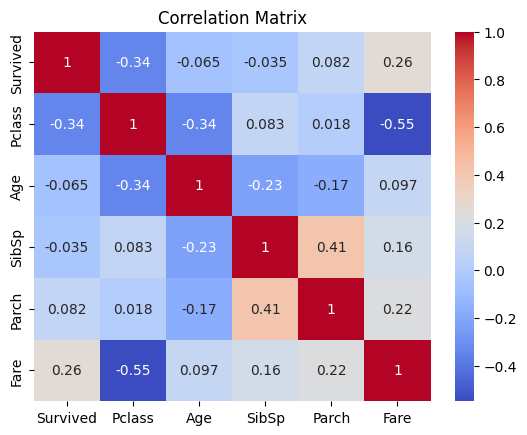

In [761]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Pclass dan Fare memiliki korelasi negativ, semakin rendah Pclass maka semakin tinggi Fare-nya
- Fitur yang paling berpengaruh terhadap Survived adalah Pclass

# Data Tranformation

## Menemukan Outliers dan Menentukan Standarisasi

In [762]:
def detect_outliers_iqr(df, features):
    outliers = []
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_indices = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outliers.extend(outlier_indices)
    return list(set(outliers))

# Fitur-fitur kontinu yang akan diidentifikasi outlier
continuous_features = ['Age', 'Fare']

# Mendeteksi outlier dalam dataset
outliers_iqr = detect_outliers_iqr(df, continuous_features)

# Menampilkan baris data yang dianggap sebagai outlier
outliers_data = df.loc[outliers_iqr]
print(outliers_data)

     Survived  Pclass                                               Name  \
1           1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
7           0       3                     Palsson, Master. Gosta Leonard   
520         1       1                              Perreault, Miss. Anne   
11          1       1                           Bonnell, Miss. Elizabeth   
15          1       2                   Hewlett, Mrs. (Mary D Kingcome)    
..        ...     ...                                                ...   
493         0       1                            Artagaveytia, Mr. Ramon   
496         1       1                     Eustis, Miss. Elizabeth Mussey   
498         0       1    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
504         1       1                              Maioni, Miss. Roberta   
505         0       1         Penasco y Castellana, Mr. Victor de Satode   

        Sex   Age  SibSp  Parch    Ticket      Fare Embarked  
1    female  38.0      1

In [763]:
# Menghapus baris yang mengandung outlier dari dataframe
df = df.drop(outliers_iqr)

# Menampilkan dataframe setelah penghapusan outlier
print(df)

     Survived  Pclass                                          Name     Sex  \
0           0       3                       Braund, Mr. Owen Harris    male   
2           1       3                        Heikkinen, Miss. Laina  female   
3           1       1  Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
4           0       3                      Allen, Mr. William Henry    male   
5           0       3                              Moran, Mr. James    male   
..        ...     ...                                           ...     ...   
886         0       2                         Montvila, Rev. Juozas    male   
887         1       1                  Graham, Miss. Margaret Edith  female   
888         0       3      Johnston, Miss. Catherine Helen "Carrie"  female   
889         1       1                         Behr, Mr. Karl Howell    male   
890         0       3                           Dooley, Mr. Patrick    male   

      Age  SibSp  Parch            Ticket     Fare 

In [764]:
from sklearn.preprocessing import StandardScaler

# Memastikan bahwa hanya outliers yang valid yang akan dihapus
valid_outliers = [idx for idx in outliers_iqr if idx in df.index]

# Menghapus outliers dari dataset
df_cleaned = df.drop(valid_outliers)

# Fitur kontinu yang akan distandarisasi
continuous_features = ['Age', 'Fare']

# Membuat objek scaler
scaler = StandardScaler()

# Melakukan standarisasi pada fitur kontinu
df_cleaned[continuous_features] = scaler.fit_transform(df_cleaned[continuous_features])

# Menampilkan data yang sudah distandarisasi
print(df_cleaned[continuous_features].head())

        Age      Fare
0 -0.608518 -0.748128
2 -0.209117 -0.698326
3  0.689534  2.634730
4  0.689534 -0.689103
5 -0.009417 -0.658978


## Memperbaiki Indeks dan Merubah Urutan Kolom

In [765]:
# Menggunakan reset_index untuk memperbaiki indeks
df = df.reset_index(drop=True)

In [766]:
# Mengubah urutan kolom
new_column_order = ['Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Pclass', 'Fare', 'Ticket', 'Embarked', 'Survived']
df = df[new_column_order]

# Melihat DataFrame setelah perubahan kolom
df

,Name,Sex,Age,SibSp,Parch,Pclass,Fare,Ticket,Embarked,Survived
0,"Braund, Mr. Owen Harris",male,22.0,1,0,3,7.2500,A/5 21171,S,0
1,"Heikkinen, Miss. Laina",female,26.0,0,0,3,7.9250,STON/O2. 3101282,S,1
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,53.1000,113803,S,1
3,"Allen, Mr. William Henry",male,35.0,0,0,3,8.0500,373450,S,0
4,"Moran, Mr. James",male,28.0,0,0,3,8.4583,330877,Q,0
...,...,...,...,...,...,...,...,...,...,...
716,"Montvila, Rev. Juozas",male,27.0,0,0,2,13.0000,211536,S,0
717,"Graham, Miss. Margaret Edith",female,19.0,0,0,1,30.0000,112053,S,1
718,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,3,23.4500,W./C. 6607,S,0
719,"Behr, Mr. Karl Howell",male,26.0,0,0,1,30.0000,111369,C,1


## Feature Engineering

### Label Encoder untuk mengubah data kategorik menjadi numerik

In [767]:
from sklearn.preprocessing import LabelEncoder

In [768]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

Mengubah kategori menjadi numerik

In [769]:
df.head()

,Name,Sex,Age,SibSp,Parch,Pclass,Fare,Ticket,Embarked,Survived
0,"Braund, Mr. Owen Harris",1,22.0,1,0,3,7.2500,A/5 21171,2,0
1,"Heikkinen, Miss. Laina",0,26.0,0,0,3,7.9250,STON/O2. 3101282,2,1
2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,1,53.1000,113803,2,1
3,"Allen, Mr. William Henry",1,35.0,0,0,3,8.0500,373450,2,0
4,"Moran, Mr. James",1,28.0,0,0,3,8.4583,330877,1,0


## Feature Selection

In [770]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [771]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,3,0,26.0,0,0,7.9250,2
2,1,0,35.0,1,0,53.1000,2
3,3,1,35.0,0,0,8.0500,2
4,3,1,28.0,0,0,8.4583,1
...,...,...,...,...,...,...,...
716,2,1,27.0,0,0,13.0000,2
717,1,0,19.0,0,0,30.0000,2
718,3,0,28.0,1,2,23.4500,2
719,1,1,26.0,0,0,30.0000,0


In [772]:
y

0      0
1      1
2      1
3      0
4      0
      ..
716    0
717    1
718    0
719    1
720    0
Name: Survived, Length: 721, dtype: int64

# Train Test Split, Memisahkan data untuk dilatih dan diuji

In [773]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

test size diberikan nilai 0.2 dengan maksud y test 20% dan random state ditentukan agar tidak acak ketika merandom test nya

### Data train

In [774]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
450,3,1,28.0,0,0,8.0500,2
357,2,0,28.0,0,0,13.0000,2
380,3,1,38.0,0,0,8.6625,2
145,1,0,50.0,0,0,28.7125,0
212,2,0,50.0,0,1,26.0000,2
...,...,...,...,...,...,...,...
71,3,1,16.0,1,3,34.3750,2
106,3,1,33.0,0,0,7.8958,0
270,2,1,28.0,0,0,13.0000,2
435,3,0,11.0,4,2,31.2750,2


In [775]:
y_train

450    0
357    1
380    0
145    0
212    1
      ..
71     0
106    0
270    0
435    0
102    0
Name: Survived, Length: 576, dtype: int64

### Data test

In [776]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
259,2,0,30.0,0,0,12.3500,1
658,3,0,23.0,0,0,7.9250,2
77,3,1,26.0,1,2,20.5750,2
65,3,1,22.0,0,0,9.0000,2
81,2,1,34.0,1,0,26.0000,2
...,...,...,...,...,...,...,...
426,3,1,28.0,0,0,7.2292,0
136,3,1,9.0,0,2,20.5250,2
265,1,1,45.5,0,0,28.5000,2
6,3,0,27.0,0,2,11.1333,2


In [777]:
y_test

259    1
658    0
77     0
65     0
81     0
      ..
426    0
136    1
265    0
6      1
469    0
Name: Survived, Length: 145, dtype: int64

# Modeling, Evaluation dan Prediction

## Random Forest

### Membangun classification model menggunakan Random Forest

In [778]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier = RandomForestClassifier(n_estimators=100, random_state=42)
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

### Evaluasi metode random forest

In [779]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_RF = RandomForestClassifier.predict(X_test)

In [780]:
df_comparison_RF = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_RF
})
df_comparison_RF

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,1
6,1,1


### Prediksi Data

In [781]:
conf_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print("Confusion Matrix:")
print(conf_matrix_RF)

Confusion Matrix:
[[75 20]
 [15 35]]


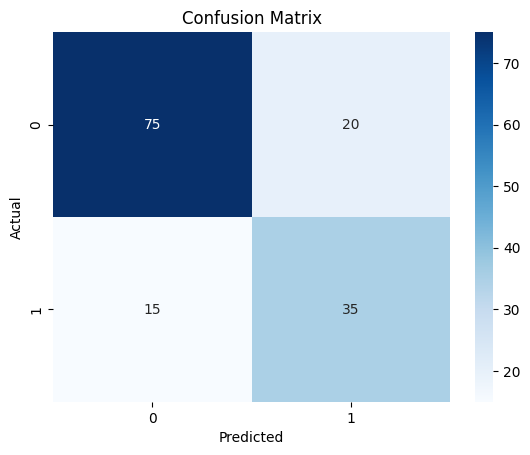

In [782]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_RF, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [783]:
accuracy_RF = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_RF:.2f}")

Accuracy: 0.76


### Feature importances (khusus random forest)

In [784]:
feature_importance = RandomForestClassifier.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
5,Fare,0.291711
2,Age,0.267383
1,Sex,0.234989
0,Pclass,0.082773
3,SibSp,0.045074
4,Parch,0.039409
6,Embarked,0.038660


## XGBoost

### Membangun classification model menggunakan XGBoost

In [785]:
from xgboost import XGBClassifier

XGBoost = XGBClassifier(n_estimators=100, learning_rate=0.1)
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Evaluasi metode XGBoost

In [786]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_XGB = XGBoost.predict(X_test)

In [787]:
df_comparison_XGB = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_XGB
})
df_comparison_XGB

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,0
6,1,0


### Prediksi Data

In [788]:
conf_matrix_XGB = confusion_matrix(y_test, y_pred_XGB)
print("Confusion Matrix:")
print(conf_matrix_XGB)

Confusion Matrix:
[[80 15]
 [19 31]]


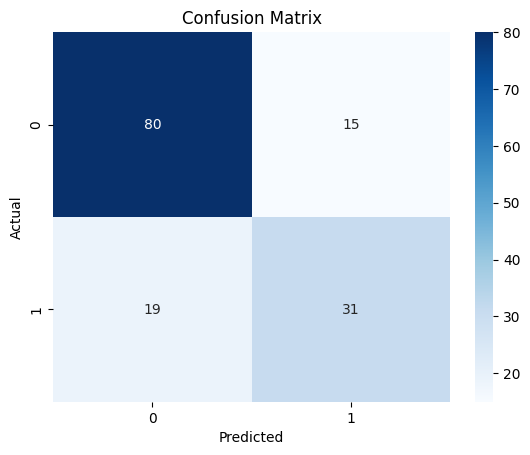

In [789]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_XGB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [790]:
accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print(f"Accuracy: {accuracy_XGB:.2f}")

Accuracy: 0.77


In [791]:
# Mengambil feature importances dari model XGBoost
feature_importance_xgb = XGBoost.feature_importances_

# Membuat DataFrame untuk menampilkan fitur dan nilai importance-nya
df_feature_importance_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Mengurutkan berdasarkan importance
df_feature_importance_xgb = df_feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Menampilkan hasil
df_feature_importance_xgb

,Feature,Importance
1,Sex,0.629957
0,Pclass,0.158510
5,Fare,0.051376
4,Parch,0.042755
3,SibSp,0.040037
6,Embarked,0.039053
2,Age,0.038313


## Naive Bayes

### Membangun classification model menggunakan Naive Bayes

In [792]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)

GaussianNB()

### Evaluasi Metode Naive Bayes

In [793]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_NB = NaiveBayes.predict(X_test)

In [794]:
df_comparison_NB = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_NB
})
df_comparison_NB

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,1
6,1,1


### Prediksi Data

In [795]:
conf_matrix_NB = confusion_matrix(y_test, y_pred_NB)
print("Confusion Matrix:")
print(conf_matrix_NB)

Confusion Matrix:
[[70 25]
 [11 39]]


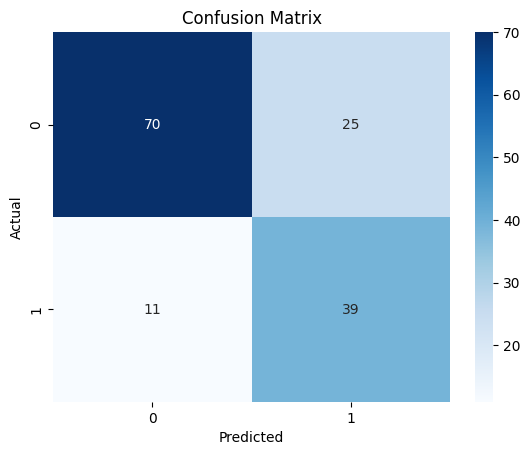

In [796]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_NB, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [797]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f"Accuracy: {accuracy_NB:.2f}")

Accuracy: 0.75


## SVM

### Membangun classification model menggunakan Support Vector Machine

In [798]:
from sklearn.svm import SVC
SupportVectorMachine = SVC(kernel='rbf')
SupportVectorMachine.fit(X_train, y_train)

SVC()

### Evaluasi Metode SVM

In [799]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_SVM = SupportVectorMachine.predict(X_test)

In [800]:
df_comparison_SVM = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_NB
})
df_comparison_SVM

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,1
6,1,1


### Prediksi Data

In [801]:
conf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print("Confusion Matrix:")
print(conf_matrix_SVM)

Confusion Matrix:
[[90  5]
 [42  8]]


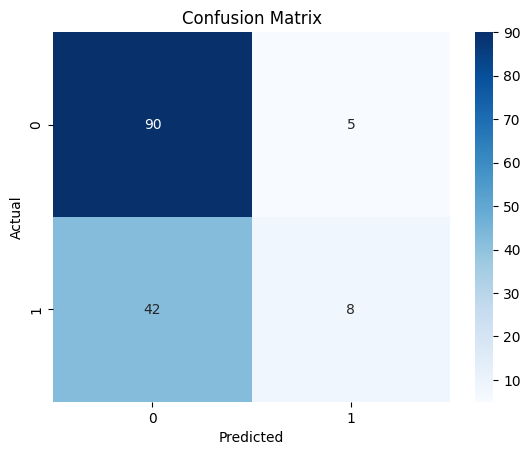

In [802]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_SVM, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [803]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f"Accuracy: {accuracy_SVM:.2f}")

Accuracy: 0.68


## Logistic Regression

### Membangun classification model menggunakan Logistic Regression

In [804]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)

LogisticRegression()

### Evaluasi Metode Logistic Regression

In [805]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_LR = LogisticRegression.predict(X_test)

In [806]:
df_comparison_LR = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_LR
})
df_comparison_LR

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,0
6,1,1


### Prediksi Data

In [807]:
conf_matrix_LR = confusion_matrix(y_test, y_pred_LR)
print("Confusion Matrix:")
print(conf_matrix_LR)

Confusion Matrix:
[[81 14]
 [16 34]]


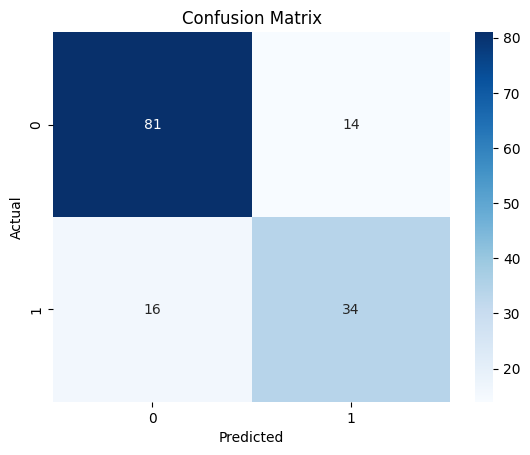

In [808]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_LR, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [809]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f"Accuracy: {accuracy_LR:.2f}")

Accuracy: 0.79


## Neural Network (MLP)

### Membangun classification model menggunakan Multi Layer Perceptron

In [810]:
from sklearn.neural_network import MLPClassifier
MultiLayerPerceptron = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
MultiLayerPerceptron.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)

### Evaluasi Metode MLP

In [811]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_MLP = MultiLayerPerceptron.predict(X_test)

In [812]:
df_comparison_MLP = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_MLP
})
df_comparison_MLP

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,1
265,0,0
6,1,0


### Prediksi Data

In [813]:
conf_matrix_MLP = confusion_matrix(y_test, y_pred_MLP)
print("Confusion Matrix:")
print(conf_matrix_MLP)

Confusion Matrix:
[[83 12]
 [19 31]]


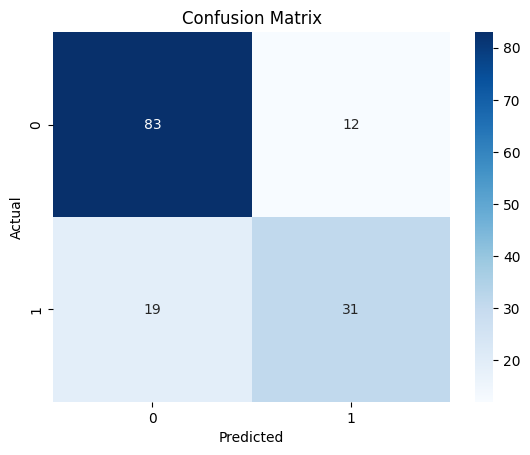

In [814]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_MLP, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [815]:
accuracy_MLP = accuracy_score(y_test, y_pred_MLP)
print(f"Accuracy: {accuracy_MLP:.2f}")

Accuracy: 0.79


## Decision Tree

In [816]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier(max_depth=4)
DecisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

### Evaluasi Metode Decision Tree

In [817]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_DT = DecisionTreeClassifier.predict(X_test)

In [818]:
df_comparison_DT = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_DT
})
df_comparison_DT

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,0
6,1,1


### Prediksi Data

In [819]:
conf_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print("Confusion Matrix:")
print(conf_matrix_DT)

Confusion Matrix:
[[83 12]
 [17 33]]


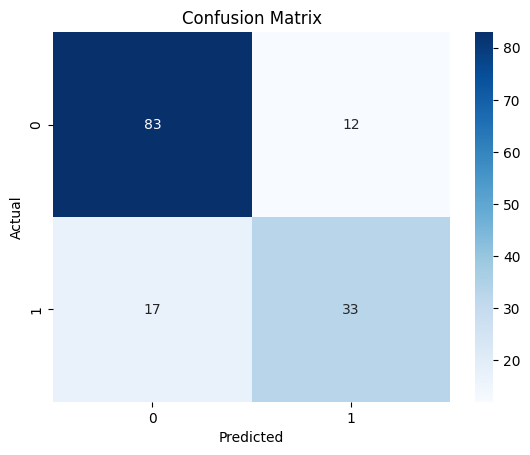

In [820]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_DT, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [821]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f"Accuracy: {accuracy_DT:.2f}")

Accuracy: 0.80


## KNN (K-Nearest Neighbors)

### Membangun classification model menggunakan K-Nearest Neighbors

In [822]:
from sklearn.neighbors import KNeighborsClassifier

KNearestNeighbors = KNeighborsClassifier(n_neighbors=5)
KNearestNeighbors.fit(X_train, y_train)

KNeighborsClassifier()

### Evaluasi Metode KNN

In [823]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_KNN = KNearestNeighbors.predict(X_test)

In [824]:
df_comparison_KNN = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_KNN
})
df_comparison_KNN

,Actual,Predicted
259,1,1
658,0,1
77,0,0
65,0,0
81,0,1
...,...,...
426,0,0
136,1,1
265,0,1
6,1,1


### Prediksi Data

In [825]:
conf_matrix_KNN = confusion_matrix(y_test, y_pred_KNN)
print("Confusion Matrix:")
print(conf_matrix_KNN)

Confusion Matrix:
[[77 18]
 [20 30]]


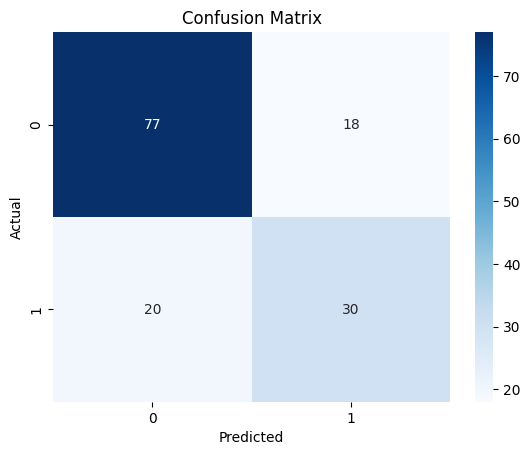

In [826]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [827]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f"Accuracy: {accuracy_KNN:.2f}")

Accuracy: 0.74


## LightGBM (Light Gradient Boosting)

### Membangun classification model menggunakan Light Gradient Boosting

In [828]:
from lightgbm import LGBMClassifier
LightGradientBoosting = LGBMClassifier(n_estimators=100)
LightGradientBoosting.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 193, number of negative: 383
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.335069 -> initscore=-0.685345
[LightGBM] [Info] Start training from score -0.685345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier()

### Evaluasi Metode LightGBM

In [829]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_lgbm = LightGradientBoosting.predict(X_test)

In [830]:
df_comparison_lgbm = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_lgbm
})
df_comparison_lgbm

,Actual,Predicted
259,1,1
658,0,0
77,0,0
65,0,0
81,0,0
...,...,...
426,0,0
136,1,0
265,0,0
6,1,0


### Prediksi Data

In [831]:
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
print("Confusion Matrix:")
print(conf_matrix_lgbm)

Confusion Matrix:
[[81 14]
 [16 34]]


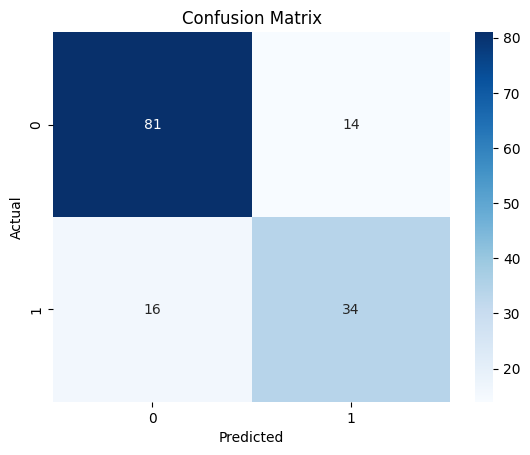

In [832]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix_lgbm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [833]:
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
print(f"Accuracy: {accuracy_lgbm:.2f}")

Accuracy: 0.79


# Evaluasi Perbandingan Setiap Model

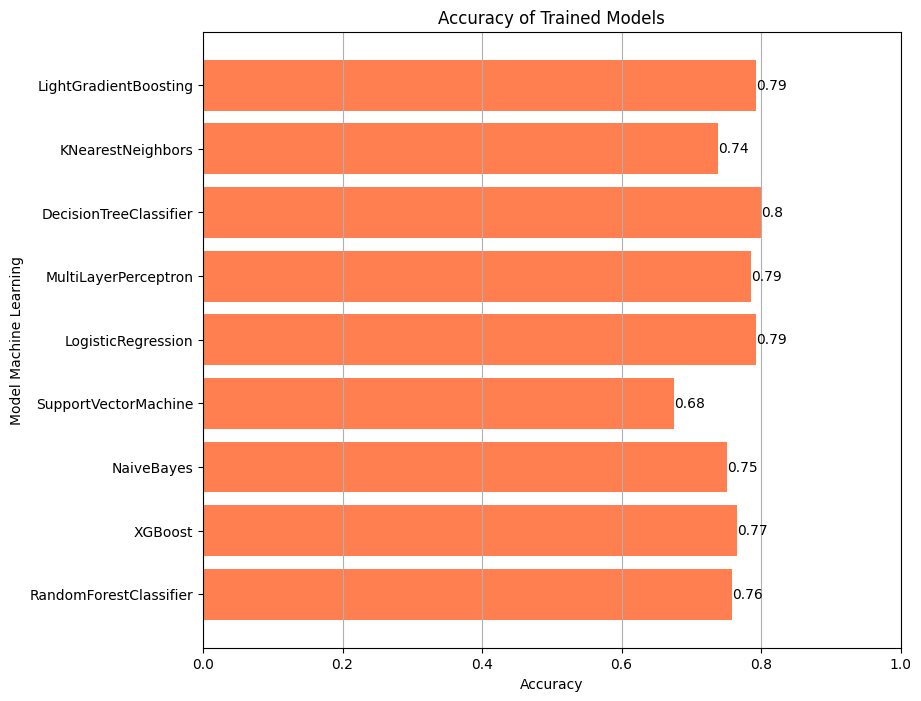

In [834]:
import matplotlib.pyplot as plt

# Nama model dan nilai akurasi (gantilah ini dengan nilai akurasi yang benar)
model_names = ['RandomForestClassifier', 'XGBoost', 'NaiveBayes', 'SupportVectorMachine', 'LogisticRegression', 'MultiLayerPerceptron', 'DecisionTreeClassifier', 'KNearestNeighbors', 'LightGradientBoosting']
accuracies = [accuracy_RF, accuracy_XGB, accuracy_NB, accuracy_SVM, accuracy_LR, accuracy_MLP, accuracy_DT, accuracy_KNN, accuracy_lgbm]

# Membuat barplot horizontal
plt.figure(figsize=(9, 8))
bars = plt.barh(model_names, accuracies, color='coral')  # Menggunakan barh untuk bar horizontal

# Menambahkan label untuk sumbu X dan Y serta judul
plt.xlabel('Accuracy')
plt.ylabel('Model Machine Learning')
plt.title('Accuracy of Trained Models')
plt.xlim(0, 1)  # Membatasi sumbu X dari 0 sampai 1 (rentang akurasi)
plt.grid(axis='x')  # Menambahkan grid pada sumbu X

# Menambahkan teks akurasi di samping setiap bar
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center', ha='left')  # Menempatkan nilai akurasi di samping bar

# Menampilkan plot
plt.show()
